The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.
There are in total 50000 train images and 10000 test images.

Importing tensorflow and other modules like numpy. If the module is not present then you can download it using pip install tensorflow on the command prompt (for windows) or if you are using a jupyter notebook then simply type !pip install tensorflow in the cell and run it in order to download the module.
    

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
#50000 images having rgb 3
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#assigning labels
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
len(label)

10

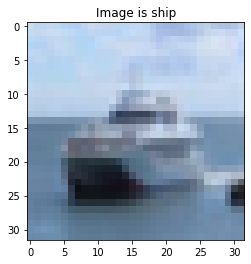

In [ ]:
import matplotlib.pyplot as plt
i = np.random.randint(1,50000)
op = label[y_train[i][0]]
plt.imshow(x_train[i])
plt.title(f'Image is {op}')
plt.show()

In [ ]:
#pixel value is from 0 to 255
x_train =x_train/255
x_test = x_test/255

In [ ]:
#no of inputs for the first layer 
#here 3072 neurons are present in first layer
32*32*3

3072

In [ ]:
# Build a ANN model
#every model has input output and hidden layer
# 4 layers: 2 hidden layers; one input and output layer
ann = tf.keras.Sequential()#sequential model
ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))#first layer as flatten layer (INPUT LAYER)
ann.add(tf.keras.layers.Dense(2048,activation='relu')) #HIDDEN LAYER 1 with 2048 neurons
ann.add(tf.keras.layers.Dense(1024,activation='relu')) #HIDDEN LAYER 2 with 1024 neurons
ann.add(tf.keras.layers.Dense(10,activation='softmax')) #OUTPUT LAYER with 10 layers as we have labelled 10 in label

In [ ]:
ann.summary()
#dense layer meand every neuron is connected to all other neurons in the next layer i.e., all neurons are connected to one another

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 8,401,930
Trainable params: 8,401,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
a=ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8777 - accuracy: 0.3289 - val_loss: 1.7194 - val_accuracy: 0.3883
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6614 - accuracy: 0.4045 - val_loss: 1.6085 - val_accuracy: 0.4247
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5836 - accuracy: 0.4335 - val_loss: 1.5858 - val_accuracy: 0.4378
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5298 - accuracy: 0.4531 - val_loss: 1.5211 - val_accuracy: 0.4613
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4896 - accuracy: 0.4647 - val_loss: 1.5074 - val_accuracy: 0.4618
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4604 - accuracy: 0.4775 - val_loss: 1.5241 - val_accuracy: 0.4624
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4373 - accuracy: 0.4859 - val_loss: 1.5019 - val_accuracy

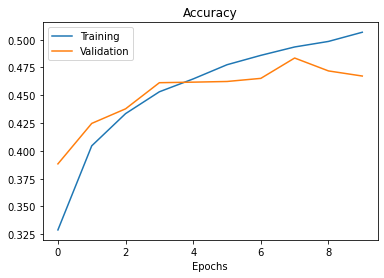

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

In [ ]:
# Building a CNN model

In [ ]:
cnn1 = tf.keras.Sequential()
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.MaxPooling2D())
cnn1.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnn1.add(tf.keras.layers.Flatten())
cnn1.add(tf.keras.layers.Dense(64,activation='relu'))
cnn1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 flatten_1 (Flatten)         (None, 512)              

In [ ]:
cnn1.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
h=cnn1.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.6051 - accuracy: 0.4145 - val_loss: 1.3479 - val_accuracy: 0.5051
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2409 - accuracy: 0.5572 - val_loss: 1.1753 - val_accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0880 - accuracy: 0.6156 - val_loss: 1.0735 - val_accuracy: 0.6211
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9858 - accuracy: 0.6529 - val_loss: 0.9972 - val_accuracy: 0.6506
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9118 - accuracy: 0.6805 - val_loss: 0.9316 - val_accuracy: 0.6706
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8608 - accuracy: 0.6975 - val_loss: 1.0002 - val_accuracy: 0.6588
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8135 - accuracy: 0.7148 - val_loss: 0.9415 - val_accuracy

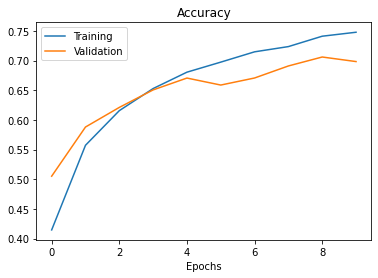

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');